## Problem Statement
### **Customer Segmentation Using Unsupervised Machine Learning**  

In today’s competitive market, businesses need to understand their customers better to enhance customer experience and maximize revenue. However, with a large volume of customer data, manually categorizing customers based on their purchasing behavior is impractical.  

The goal of this project is to apply **unsupervised machine learning techniques** to segment customers into distinct groups based on their purchasing patterns, demographics, and behavioral traits. These segments can help businesses tailor marketing strategies, improve customer retention, and optimize product recommendations.  

By using clustering algorithms such as **K-Means, Hierarchical Clustering, or DBSCAN**, we will analyze customer data and uncover hidden patterns. The insights from this analysis will help businesses identify **high-value customers, frequent buyers, and potential churners**, leading to data-driven decision-making for personalized marketing campaigns.

In [115]:
# Data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

# Evaluation metrics
from sklearn.metrics import silhouette_score

# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# K-Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [117]:
#import the dataset
df = pd.read_csv('cleaned_dataset.csv')

In [119]:
# Initial data exploration
print("First 5 rows:")
display(df.head())

First 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1967,Graduation,Single,872070.0,0,0,2022-09-04,58,9525.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1964,Graduation,Single,695160.0,1,1,2024-03-08,38,165.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1975,Graduation,Together,1074195.0,0,0,2023-08-21,26,6390.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1994,Graduation,Together,399690.0,1,0,2024-02-10,26,165.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1991,PhD,Married,874395.0,1,0,2024-01-19,94,2595.0,...,5,0,0,0,0,0,0,3,11,0


In [121]:
print("\nLast 5 rows:")
display(df.tail())


Last 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1977,Graduation,Married,918345.0,0,1,2023-06-13,46,10635.0,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1956,PhD,Together,960210.0,2,1,2024-06-10,56,6090.0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1991,Graduation,Divorced,854715.0,0,0,2024-01-25,91,13620.0,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1966,Master,Together,1038675.0,0,1,2024-01-24,8,6420.0,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1964,PhD,Married,793035.0,1,1,2022-10-15,40,1260.0,...,7,0,0,0,0,0,0,3,11,1


In [123]:
print("\nDataset shape:", df.shape)


Dataset shape: (2240, 29)


In [125]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2222 non-null   float64
 10  MntFruits            1835 non-null   float64
 11  MntMeatProducts      2234 non-null   float64
 12  MntFishProducts      1852 non-null   float64
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [127]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2222.000000,1835.000000,2234.000000,1852.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1978.805804,7.837088e+05,0.444196,0.506250,49.109375,4632.016202,479.656676,2547.911817,679.940605,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,3.775961e+05,0.538398,0.544538,28.962453,5296.121869,624.190483,3778.405792,855.874477,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1903.000000,2.595000e+04,0.000000,0.000000,0.000000,15.000000,15.000000,15.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1969.000000,5.295450e+05,0.000000,0.000000,24.000000,360.000000,60.000000,240.000000,90.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1980.000000,7.707225e+05,0.000000,0.000000,49.000000,2677.500000,210.000000,1005.000000,285.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1987.000000,1.027830e+06,1.000000,1.000000,74.000000,7597.500000,645.000000,3506.250000,960.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2006.000000,9.999990e+06,2.000000,2.000000,99.000000,58425.000000,2985.000000,80550.000000,3885.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Description


The dataset contains **29 columns** related to customer demographics, purchase behavior, and marketing campaign responses. Here’s a breakdown of each column:

- **ID**: Unique identifier for each customer.
- **Year_Birth**: Year of birth of the customer.
- **Education**: Customer’s education level (e.g., Graduation, PhD).
- **Marital_Status**: Marital status of the customer (e.g., Single, Married, Together).
- **Income**: Annual income of the customer.
- **Kidhome**: Number of children in the household.
- **Teenhome**: Number of teenagers in the household.
- **Dt_Customer**: Date when the customer enrolled with the company.
- **Recency**: Number of days since the last purchase.
- **MntWines**: Amount spent on wine products.
- **MntFruits**: Amount spent on fruit products.
- **MntMeatProducts**: Amount spent on meat products.
- **MntFishProducts**: Amount spent on fish products.
- **MntSweetProducts**: Amount spent on sweet products.
- **MntGoldProds**: Amount spent on gold products.
- **NumDealsPurchases**: Number of purchases made using discounts.
- **NumWebPurchases**: Number of purchases made online.
- **NumCatalogPurchases**: Number of purchases made through catalogs.
- **NumStorePurchases**: Number of purchases made in physical stores.
- **NumWebVisitsMonth**: Number of times the customer visited the company’s website in the last month.
- **AcceptedCmp1** to **AcceptedCmp5**: Whether the customer accepted a particular campaign offer (1 = Yes, 0 = No).
- **Response**: Whether the customer responded to the last campaign (1 = Yes, 0 = No).
- **Complain**: Whether the customer has made a complaint in the last 2 years (1 = Yes, 0 = No).
- **Z_CostContact**: Standardized cost of contact (constant value).
- **Z_Revenue**: Standardized revenue generated (constant value).



## Handling NULL-Values

In [132]:
#Checking for number of null vallues in Income Column
df["Income"].isnull().sum()

24


> - The **Income** column has **24 missing values**.  
> - Since income data is often **skewed**, the median is usually the best choice for imputation as it:  
>   - **Preserves data** while handling skewed distributions.  
>   - **Prevents information loss** compared to dropping rows.  
> - However, **Income must always be greater than or equal to total spending** (`MntWines`, `MntFruits`, etc.).  
> - **Blindly imputing the median** might lead to unrealistic cases where spending exceeds income.  
> - The **simplest and most reliable solution** is to **drop these 24 records**. Since they make up only **~1.07% of the dataset**, this decision ensures data integrity while minimizing risk.  

In [135]:
# Dropping rows where 'Income' is null
df.dropna(subset=['Income'], inplace=True)

In [137]:
#CrossChecking for number of null vallues in Income Column
df["Income"].isnull().sum()

0

> - Now, that we have addressed the **Income** column, We still have null values in **9 to 13th** columns. Let me check the percentage of null values first, so that we decide on what imputation method or approach can we take.

In [140]:
#Calculate the percentage of missing values in each column
missing_percentage = df.iloc[:, 9:13].isnull().sum() / len(df) * 100
print(missing_percentage)

MntWines            0.812274
MntFruits          18.050542
MntMeatProducts     0.270758
MntFishProducts    17.283394
dtype: float64


> - **`MntWines` (0.81% missing)** and **`MntMeatProducts` (0.27% missing)** → We will use **overall median imputation** because:  
>  - Missing values are **very low (<1%)**, so filling with the median has **minimal impact**.  
>  - Median is **robust to outliers** and preserves the original data distribution.  

> - **`MntFruits` (18.05%) & `MntFishProducts` (17.28%)** → We'll use **group-based median imputation** because:  
>  - A **high percentage (>15%)** of missing values can distort data if imputed with a single median.  
>  - Spending patterns **vary by customer category**, so we impute using the **median within each Education group** to maintain realistic spending trends.  


In [143]:
#Using median imputation method for MntMeatProducts column to fill missing values
df["MntWines"].fillna(df["MntWines"].median(), inplace=True)
df["MntMeatProducts"].fillna(df["MntMeatProducts"].median(), inplace=True)


> - The best approach to filling missing values in the remaining columns is **grouping by the `Education` column** and imputing them with the **median of the respective group**.  
> - This method ensures that spending patterns remain **realistic**, as customers with similar education levels are likely to have **similar spending behaviors**.

In [146]:
#Filling th eremaining columns by medianImputation method for respective groups
df["MntFruits"] = df.groupby("Education")["MntFruits"].transform(lambda x: x.fillna(x.median()))
df["MntFishProducts"] = df.groupby("Education")["MntFishProducts"].transform(lambda x: x.fillna(x.median()))


In [148]:
# cross checking the null values in all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   float64
 10  MntFruits            2216 non-null   float64
 11  MntMeatProducts      2216 non-null   float64
 12  MntFishProducts      2216 non-null   float64
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

> - Now that we have handled missing values, the next step is to **identify and analyze outliers** in numeric columns using **boxplots**. Detecting outliers helps ensure data consistency and prevents extreme values from skewing the results.

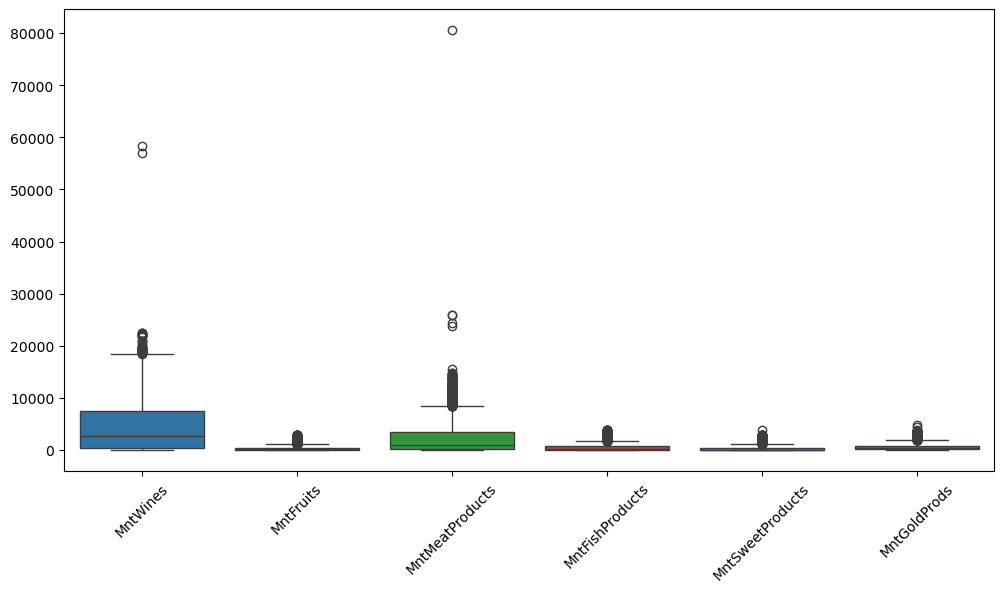

In [151]:
# Boxplot for spending columns
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[spending_columns])
plt.xticks(rotation=45)
plt.show()

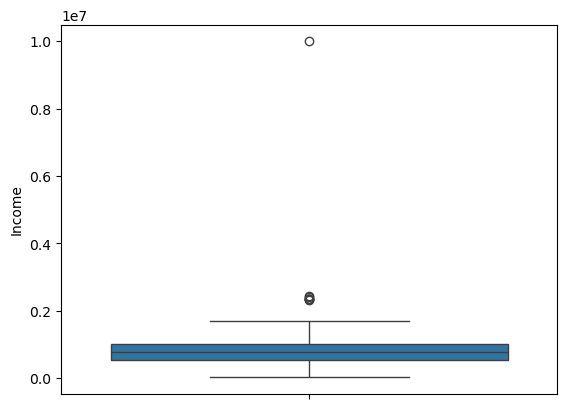

In [152]:
sns.boxplot(data=df['Income'])
plt.xticks(rotation=45)
plt.show()

In [153]:
max_income_index = df['Income'].idxmax()
df = df.drop(max_income_index)
df = df.reset_index(drop=True)
print("New maximum Income after outlier removal:", df['Income'].max())

New maximum Income after outlier removal: 2435955.0


> - There are few Extremely high vales in **`MntWines`** column and **`MntMeatProducts`** column and we will drop those rows.

In [158]:
#Drop the rows where MntMeatProducts > 20000 and MntWines > 25000 
df = df[~((df["MntMeatProducts"] > 20000) | (df["MntWines"] > 25000))]

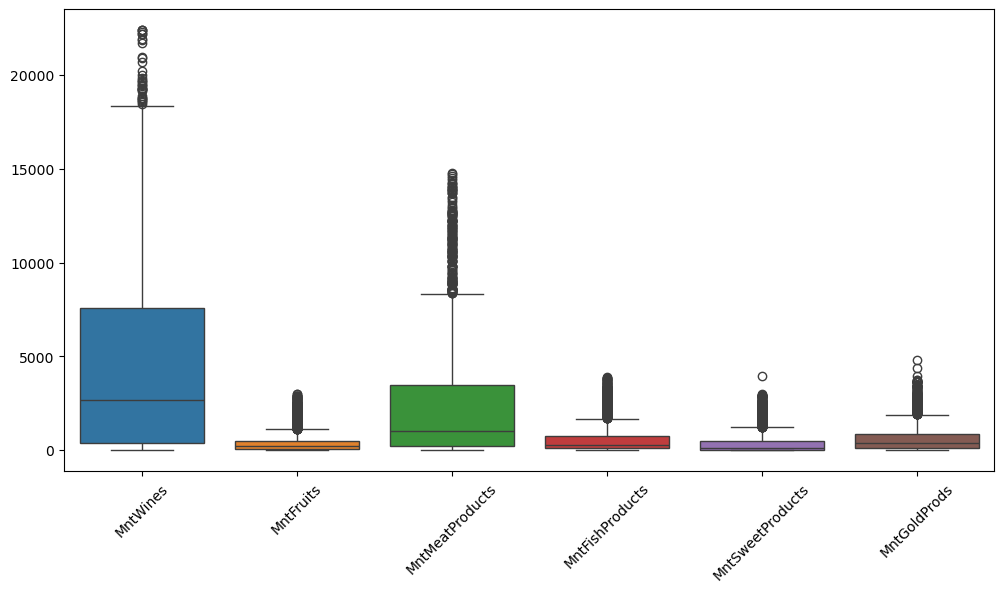

In [159]:
# Boxplot for spending columns
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[spending_columns])
plt.xticks(rotation=45)
plt.show()

> - Some outliers are still present, but they can be considered as customers who spend a high amount in that category.

In [162]:
#check for number of duplicate records in the data
df.duplicated().sum()

0

> - There are no duplicates in the dataset.

**check for any abnormalities in the columns.**
> - Logically user's spendings should be less than his/her income.
> - Check whether there is any inconsistency.
> - There are no records that are iconsistent.

In [167]:
df[df["Income"] < df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


 - Check whether there are any typos in the values in the categorical columns.

In [170]:
df["Education"].value_counts()

Education
Graduation    1112
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [172]:
df["Marital_Status"].value_counts()

Marital_Status
Married     852
Together    571
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [174]:
#Update the names of Alone as Single and Absurd as Other.
df["Marital_Status"] = df["Marital_Status"].replace({"Alone": "Single", "Absurd": "Other"})

In [176]:
#Cross-checking the update
df["Marital_Status"].value_counts()

Marital_Status
Married     852
Together    571
Single      474
Divorced    232
Widow        76
Other         2
YOLO          2
Name: count, dtype: int64

- Check whether there are any negative values in numeric columns.

In [179]:
numeric_cols = df.select_dtypes(include=["number"]).columns  # Select only numeric columns
negative_values = df[numeric_cols].lt(0).any(axis=1)  # Check if any numeric column has negative values
df[negative_values]  # Display rows with negative values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


- Check whether all the datatypes are correct.

In [182]:
df.dtypes  # Check column data types

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [184]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # Convert to datetime
df.dtypes  # Verify if conversion was successful

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                      float64
MntFruits                     float64
MntMeatProducts               float64
MntFishProducts               float64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

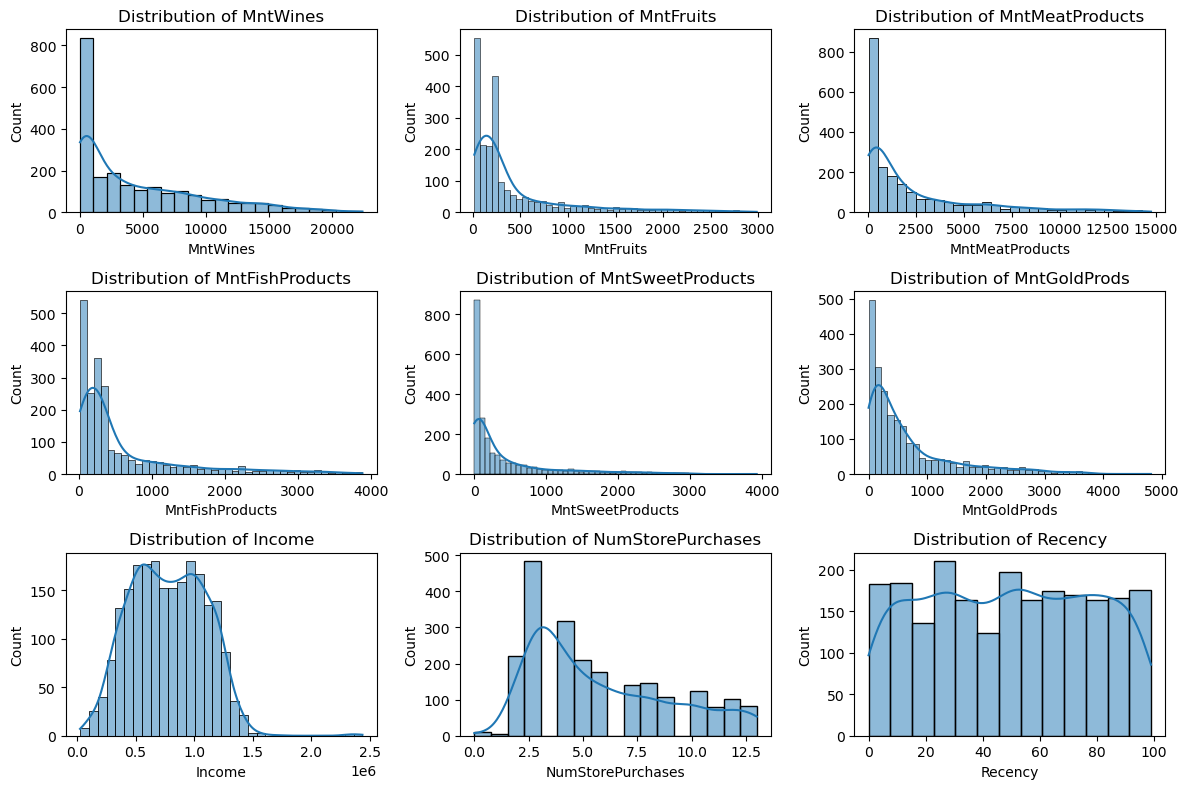

In [186]:
# Define numerical columns (consistent with preprocessing)
numerical_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds', 'Income']

# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols + ['NumStorePurchases', 'Recency'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Feature Selection

> We will identify the most important features using different techniques and remove irrelevant or redundant ones.
>
> - Compute the correlation between numerical features to identify multicollinearity.
> - Features with very high correlation (>0.85) might be redundant and can be removed.

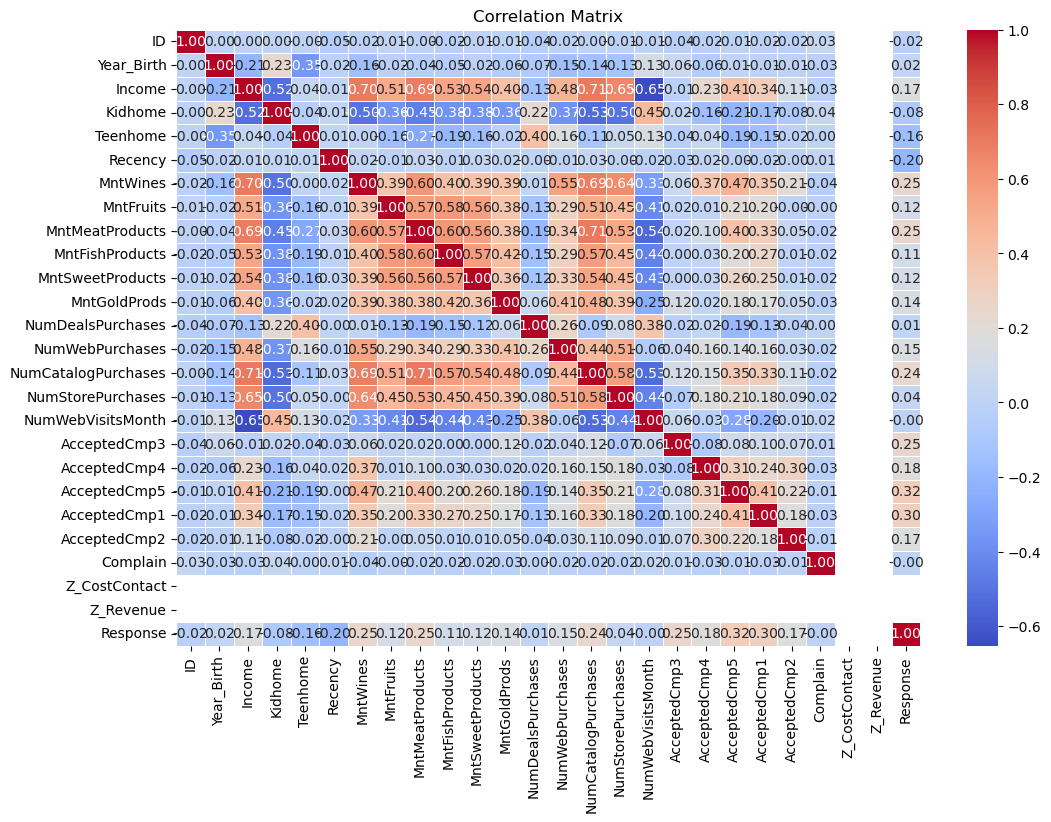

In [189]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

> There are no Highly Correlated features in the dataset.

## Feature Engineering

> Convert Dates into Meaningful Numerical Features.
> - Create Customer_Tenure (Time Since Enrollment in Months).
> - The Dt_Customer column represents when a customer joined.
> - We convert this into "Customer Tenure" in months (how long they’ve been a customer).
> - Clustering will benefit from knowing how long a customer has been active.

In [193]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])  # Ensure it's a datetime type
df["Customer_Tenure"] = (pd.Timestamp.today() - df["Dt_Customer"]).dt.days // 30  # Convert days to months

> Create Total Spending Feature
> - Calculate Total_Spending (Sum of all spending categories)
> - We sum up the spending on different product categories to get an overall spending amount.
> - Instead of looking at individual categories, this gives a single metric of total spending.

In [195]:
df["Total_Spending"] = df[["MntWines", "MntFruits", "MntMeatProducts", 
                           "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)


In [196]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Total_Spending
0,5524,1967,Graduation,Single,872070.0,0,0,2022-09-04,58,9525.0,...,0,0,0,0,0,3,11,1,32,24255.0
1,2174,1964,Graduation,Single,695160.0,1,1,2024-03-08,38,165.0,...,0,0,0,0,0,3,11,0,14,405.0
2,4141,1975,Graduation,Together,1074195.0,0,0,2023-08-21,26,6390.0,...,0,0,0,0,0,3,11,0,20,11640.0
3,6182,1994,Graduation,Together,399690.0,1,0,2024-02-10,26,165.0,...,0,0,0,0,0,3,11,0,15,795.0
4,5324,1991,PhD,Married,874395.0,1,0,2024-01-19,94,2595.0,...,0,0,0,0,0,3,11,0,15,6330.0


> Categorizing Customers Based on Spending
> - Create Spending_Category (High, Medium, Low)
> - We divide customers into three categories based on their total spending.
> - Why? Helps in segmentation—High spenders might need premium offers, while low spenders need discounts.

In [198]:
df["Spending_Category"] = pd.qcut(df["Total_Spending"], q=3, labels=["Low", "Medium", "High"])

> Create Engaged_Customer Feature
> - If a customer visited the website often and made many purchases, they are highly engaged.
> - We classify customers based on their total number of purchases and website visits.
> - Helps differentiate between regular vs occasional buyers.

In [200]:
df["Total_Purchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["Engaged_Customer"] = df["Total_Purchases"].apply(lambda x: "High" if x > df["Total_Purchases"].median() else "Low")


In [202]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Total_Spending,Spending_Category,Total_Purchases,Engaged_Customer
0,5524,1967,Graduation,Single,872070.0,0,0,2022-09-04,58,9525.0,...,0,0,3,11,1,32,24255.0,High,25,High
1,2174,1964,Graduation,Single,695160.0,1,1,2024-03-08,38,165.0,...,0,0,3,11,0,14,405.0,Low,6,Low
2,4141,1975,Graduation,Together,1074195.0,0,0,2023-08-21,26,6390.0,...,0,0,3,11,0,20,11640.0,Medium,21,High
3,6182,1994,Graduation,Together,399690.0,1,0,2024-02-10,26,165.0,...,0,0,3,11,0,15,795.0,Low,8,Low
4,5324,1991,PhD,Married,874395.0,1,0,2024-01-19,94,2595.0,...,0,0,3,11,0,15,6330.0,Medium,19,High


> Standardize Numerical Features for Consistent Scaling.  
> - Standardize numerical features to have a mean of 0 and standard deviation of 1.  
> - This ensures that features with different scales (e.g., Income, NumStorePurchases) don’t disproportionately influence clustering algorithms like K-Means or DBSCAN.  

In [204]:
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [205]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Total_Spending,Spending_Category,Total_Purchases,Engaged_Customer
0,-0.020646,-0.986238,Graduation,Single,0.298076,-0.823691,-0.930876,2022-09-04,0.308909,0.976669,...,-0.117336,-0.097968,0.0,0.0,2.373528,1.522275,1.682041,High,1.336071,High
1,-1.051774,-1.236642,Graduation,Single,-0.259447,1.038677,0.906752,2024-03-08,-0.382389,-0.878059,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-1.136925,-0.977982,Low,-1.161201,Low
2,-0.446332,-0.318494,Graduation,Together,0.935062,-0.823691,-0.930876,2023-08-21,-0.797168,0.355454,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-0.250525,0.275073,Medium,0.810330,High
3,0.181886,1.267399,Graduation,Together,-1.190605,1.038677,-0.930876,2024-02-10,-0.797168,-0.878059,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-0.989191,-0.934485,Low,-0.898330,Low
4,-0.082206,1.016995,PhD,Married,0.305403,1.038677,-0.930876,2024-01-19,1.553247,-0.396543,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-0.989191,-0.317159,Medium,0.547459,High


> Encode Categorical Features for Clustering.  
> - Convert categorical columns (Spending_Category, Engaged_Customer) into numerical values for clustering.  
> - This step ensures that clustering algorithms can process these features.  

In [207]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Apply LabelEncoder to the Spending_Category column
df["Spending_Category"] = encoder.fit_transform(df["Spending_Category"])  # Low=0, Medium=1, High=2

# Apply LabelEncoder to the Engaged_Customer column
df["Engaged_Customer"] = encoder.fit_transform(df["Engaged_Customer"])


In [208]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Total_Spending,Spending_Category,Total_Purchases,Engaged_Customer
0,-0.020646,-0.986238,Graduation,Single,0.298076,-0.823691,-0.930876,2022-09-04,0.308909,0.976669,...,-0.117336,-0.097968,0.0,0.0,2.373528,1.522275,1.682041,0,1.336071,0
1,-1.051774,-1.236642,Graduation,Single,-0.259447,1.038677,0.906752,2024-03-08,-0.382389,-0.878059,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-1.136925,-0.977982,1,-1.161201,1
2,-0.446332,-0.318494,Graduation,Together,0.935062,-0.823691,-0.930876,2023-08-21,-0.797168,0.355454,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-0.250525,0.275073,2,0.810330,0
3,0.181886,1.267399,Graduation,Together,-1.190605,1.038677,-0.930876,2024-02-10,-0.797168,-0.878059,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-0.989191,-0.934485,1,-0.898330,1
4,-0.082206,1.016995,PhD,Married,0.305403,1.038677,-0.930876,2024-01-19,1.553247,-0.396543,...,-0.117336,-0.097968,0.0,0.0,-0.421314,-0.989191,-0.317159,2,0.547459,0


- The **Education** and **Marital_Status** columns are categorical and need encoding. Since these are nominal (no inherent order), we’ll use one-hot encoding to avoid introducing artificial ordinality.

In [210]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Display the updated dataframe
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.020646,-0.986238,0.298076,-0.823691,-0.930876,2022-09-04,0.308909,0.976669,1.543340,1.774107,...,False,True,False,False,False,False,True,False,False,False
1,-1.051774,-1.236642,-0.259447,1.038677,0.906752,2024-03-08,-0.382389,-0.878059,-0.727841,-0.735619,...,False,True,False,False,False,False,True,False,False,False
2,-0.446332,-0.318494,0.935062,-0.823691,-0.930876,2023-08-21,-0.797168,0.355454,0.525225,-0.173255,...,False,True,False,False,False,False,False,True,False,False
3,0.181886,1.267399,-1.190605,1.038677,-0.930876,2024-02-10,-0.797168,-0.878059,-0.649524,-0.670552,...,False,True,False,False,False,False,False,True,False,False
4,-0.082206,1.016995,0.305403,1.038677,-0.930876,2024-01-19,1.553247,-0.396543,0.368591,-0.215083,...,False,False,False,True,True,False,False,False,False,False


Columns like **ID**, **Dt_Customer**, **Z_CostContact**, and **Z_Revenue** are unlikely to contribute to meaningful clustering:

- **ID:** Unique identifier, not useful for clustering.
- **Dt_Customer:** Already used to derive Customer_Tenure, so it’s redundant.
- **Z_CostContact** and **Z_Revenue:** Constant values (all 3 and 11, respectively), providing no variance.

In [219]:
# Drop irrelevant columns
df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [223]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986238,0.298076,-0.823691,-0.930876,0.308909,0.976669,1.543340,1.774107,2.472446,1.482401,...,False,True,False,False,False,False,True,False,False,False
1,-1.236642,-0.259447,1.038677,0.906752,-0.382389,-0.878059,-0.727841,-0.735619,-0.734011,-0.634467,...,False,True,False,False,False,False,True,False,False,False
2,-0.318494,0.935062,-0.823691,-0.930876,-0.797168,0.355454,0.525225,-0.173255,1.321894,-0.147830,...,False,True,False,False,False,False,False,True,False,False
3,1.267399,-1.190605,1.038677,-0.930876,-0.797168,-0.878059,-0.649524,-0.670552,-0.583119,-0.585803,...,False,True,False,False,False,False,False,True,False,False
4,1.016995,0.305403,1.038677,-0.930876,1.553247,-0.396543,0.368591,-0.215083,0.095896,-0.001839,...,False,False,False,True,True,False,False,False,False,False


In [226]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Tenure',
       'Total_Spending', 'Spending_Category', 'Total_Purchases',
       'Engaged_Customer', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Other', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

> Perform K-Means Clustering on Selected Features with Missing Values Dropped.  
> - Apply K-Means clustering on NumStorePurchases and Income after dropping rows with missing values.  
> - Evaluate the clustering quality using the silhouette score.  

In [230]:
X = df[['NumStorePurchases', 'Income']].copy()
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4807


> Apply K-Means Clustering with Elbow Method for Optimal Cluster Selection.  
> - Conduct K-Means clustering on scaled Income and NumStorePurchases features.  
> - Use the elbow method to plot inertia across k values (2 to 10) and identify the optimal number of clusters.  
> - Ensures features are standardized and missing values are handled prior to clustering.

Dataset shape before clustering: (2209, 38)
Missing values before clustering:
Income               0
NumStorePurchases    0
dtype: int64
Feature distributions:
             Income  NumStorePurchases
count  2.209000e+03       2.209000e+03
mean   4.664042e-17      -1.889741e-17
std    1.000226e+00       1.000226e+00
min   -2.368427e+00      -1.791598e+00
25%   -7.840683e-01      -8.665553e-01
50%   -2.190643e-02      -2.498605e-01
75%    7.830364e-01       6.751817e-01
max    5.226578e+00       2.216919e+00


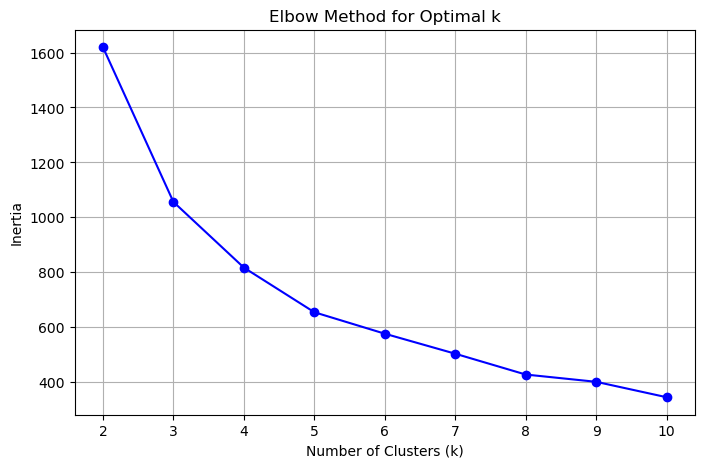

In [234]:
# Verify dataset state
print(f"Dataset shape before clustering: {df.shape}")
print(f"Missing values before clustering:\n{df[['Income', 'NumStorePurchases']].isnull().sum()}")
print(f"Feature distributions:\n{df[['Income', 'NumStorePurchases']].describe()}")

# Define features
features = ['Income', 'NumStorePurchases']
X_imputed = df[features].copy()

# Scale features
scaler = StandardScaler()
X_scaled_imputed = scaler.fit_transform(X_imputed)

# Elbow method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_imputed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


> Compare **K-Means Clustering** with **Imputed** vs. **Dropped** Data and Select the Best Approach.  
> - Apply **K-Means** (k=3) on both **imputed** and **dropped** datasets, evaluate using **silhouette scores**, and choose the better clustering.  
> - Visualize the final **clusters** with **centroids** to interpret customer segments.  
> - Assumes **X_scaled_imputed** and **X** are defined; **scaler** must be consistent for inverse transformation.

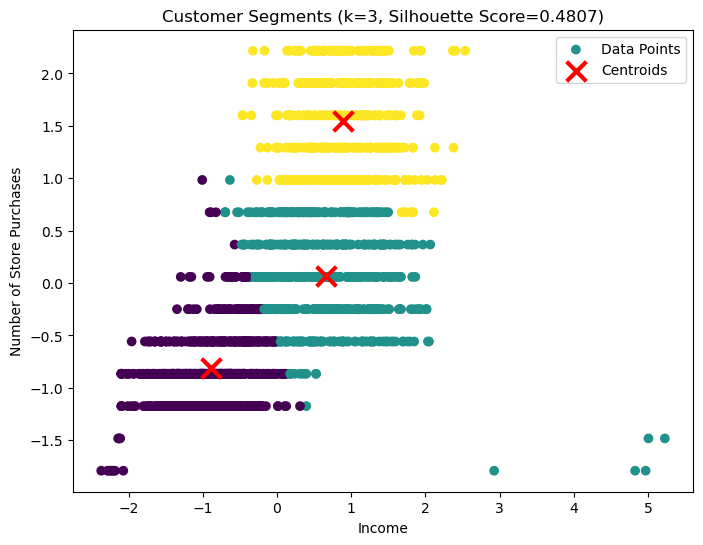

In [237]:
# Step 1: Prepare the data (copy relevant features)
X = df[['NumStorePurchases', 'Income']].copy()

# Step 2: Standardize the features (since KMeans is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Calculate the silhouette score
sil_score = silhouette_score(X_scaled, clusters)

# Step 5: Get the centroids (in scaled space)
centroids = kmeans.cluster_centers_

# Step 6: Create the scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot of data points, colored by cluster
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=clusters, cmap='viridis', label='Data Points')
# Plot centroids with red 'X'
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=200, linewidths=3, label='Centroids')
# Add title with silhouette score
plt.title(f'Customer Segments (k=3, Silhouette Score={sil_score:.4f})')
# Label axes
plt.xlabel('Income')
plt.ylabel('Number of Store Purchases')
# Add legend
plt.legend()
# Show plot
plt.show()

> Calculate **Total_Spending** and Summarize **Clusters** with **Size Distribution**.  
> - Compute **Total_Spending** by summing spending columns and analyze **cluster characteristics** with mean values.  
> - Visualize the **cluster size distribution** to understand the number of customers per **cluster**.  
> - Assumes **spending_cols** have missing values handled; **Cluster** column must be defined from prior clustering.

Cluster Summary (Mean Values):


,Income,NumStorePurchases,Recency,Total_Spending,MntWines,Kidhome,Teenhome
Cluster,,,,,,,
0,-0.887497,-0.807924,-0.005410,-0.810749,-0.760098,0.614827,-0.112543
1,0.655509,0.063826,-0.017537,0.485968,0.456822,-0.434018,0.174883
2,0.891301,1.548525,0.035219,0.970327,0.908027,-0.645260,-0.013896


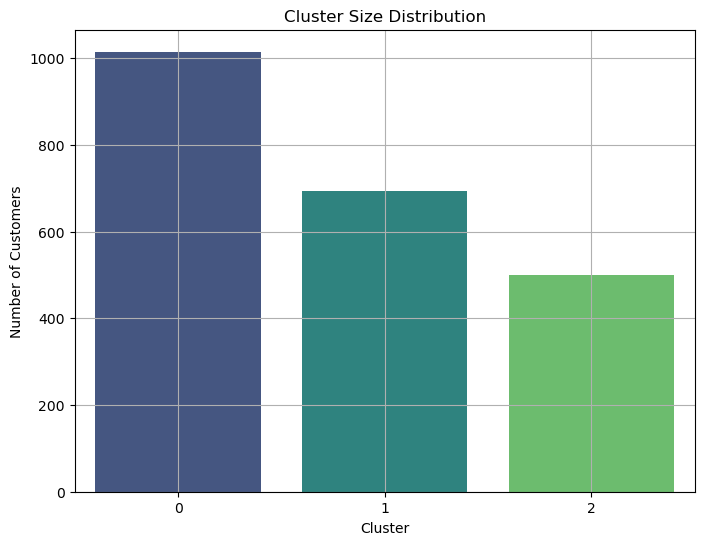

In [248]:
# Step 3: Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters



# Cluster summary
summary_cols = features + ['Recency', 'Total_Spending', 'MntWines', 'Kidhome', 'Teenhome']
cluster_summary = df.groupby('Cluster')[summary_cols].mean()
print("Cluster Summary (Mean Values):")
display(cluster_summary)

# Cluster size distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

> Perform **Hierarchical Clustering** with **Dendrogram** and Evaluate Results.  
> - Apply **hierarchical clustering** on scaled **Income** and **NumStorePurchases**, using a **dendrogram** to explore cluster structure.  
> - Cluster into **k=5** groups, compute the **silhouette score**, and visualize the resulting **clusters**.  
> - Assumes **X_scaled** is defined and contains scaled data for clustering.

X_scaled shape for Hierarchical Clustering: (2209, 2)


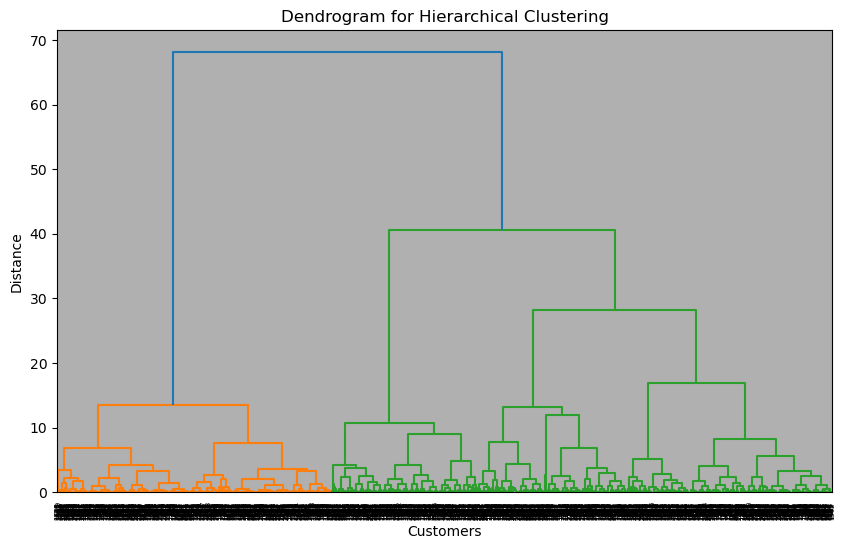

Silhouette Score for Hierarchical Clustering (k=3): 0.4030


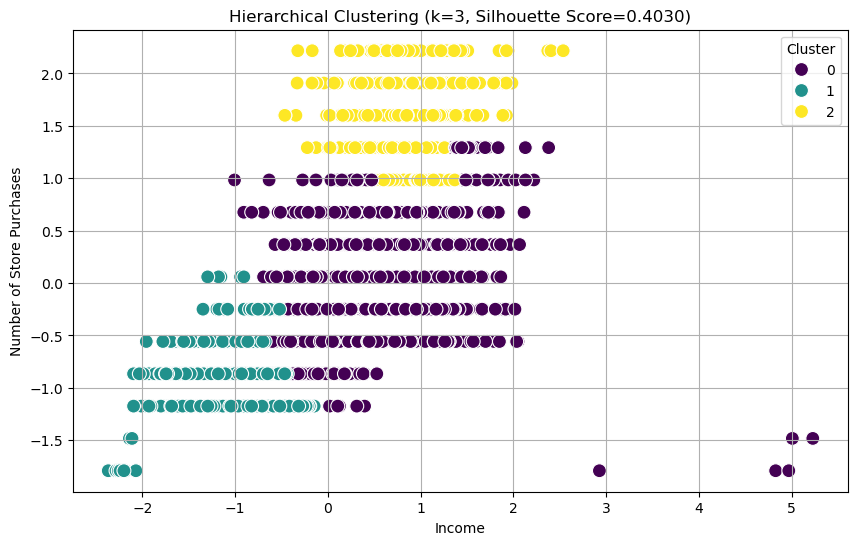

In [87]:
# Verify X_scaled shape
print(f"X_scaled shape for Hierarchical Clustering: {X_scaled.shape}")

# Dendrogram to find optimal clusters
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Apply Hierarchical Clustering with k=3
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hier_Cluster'] = hier.fit_predict(X_scaled)

# Calculate silhouette score
hier_sil_score = silhouette_score(X_scaled, df['Hier_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering (k=3): {hier_sil_score:.4f}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='NumStorePurchases', hue='Hier_Cluster', palette='viridis', data=df, s=100)
plt.title(f'Hierarchical Clustering (k=3, Silhouette Score={hier_sil_score:.4f})')
plt.xlabel('Income')
plt.ylabel('Number of Store Purchases')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

> Create **Box Plots** to Analyze **Feature Distributions** Across **Clusters**.  
> - Visualize the distribution of **Income**, **NumStorePurchases**, **Total_Spending**, and **Recency** for each **cluster** using **box plots**.  
> - Helps identify **cluster characteristics** and differences in feature spread and central tendencies.  
> - Assumes **Cluster** column and listed features are defined in the DataFrame.  

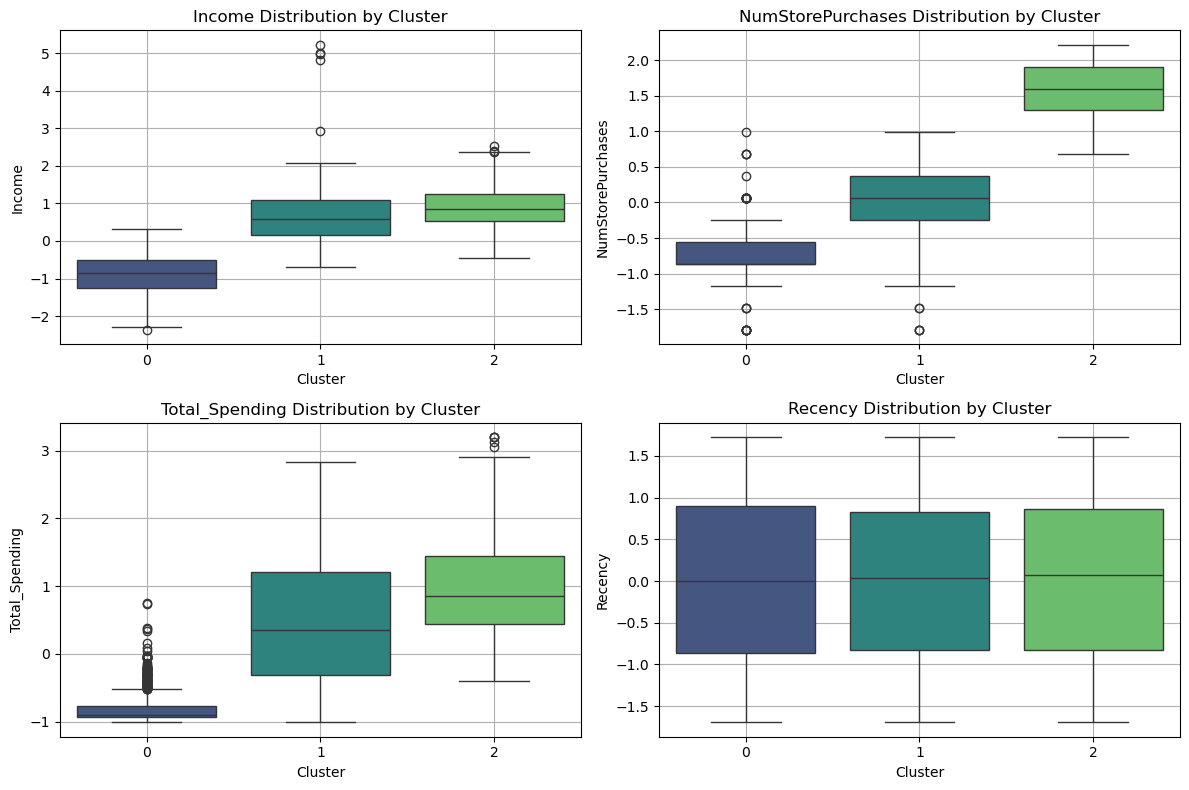

In [250]:
# Define features to visualize
features_to_plot = ['Income', 'NumStorePurchases', 'Total_Spending', 'Recency']

# Create subplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
plt.tight_layout()
plt.show()

> Generate a **K-Distance Plot** to Determine Optimal **eps** for **DBSCAN**.  
> - Plot the sorted distances to the **5th nearest neighbor** for each point in **X_scaled** to find a suitable **eps** value.  
> - The **elbow point** in the plot indicates the optimal **eps** (e.g., 1.0) for **DBSCAN** clustering.  
> - Assumes **X_scaled** contains scaled data with 2205 rows and 2 features.  

> Create an **Interactive Scatter Plot** for **DBSCAN Clusters** Using **Plotly**.  
> - Visualize **Income** vs. **NumStorePurchases** with points colored by **DBSCAN_Cluster**, including **hover information**.  
> - Allows **zooming**, **panning**, and **hovering** to explore **clusters** and **noise points** interactively.  

<Figure size 1000x800 with 0 Axes>

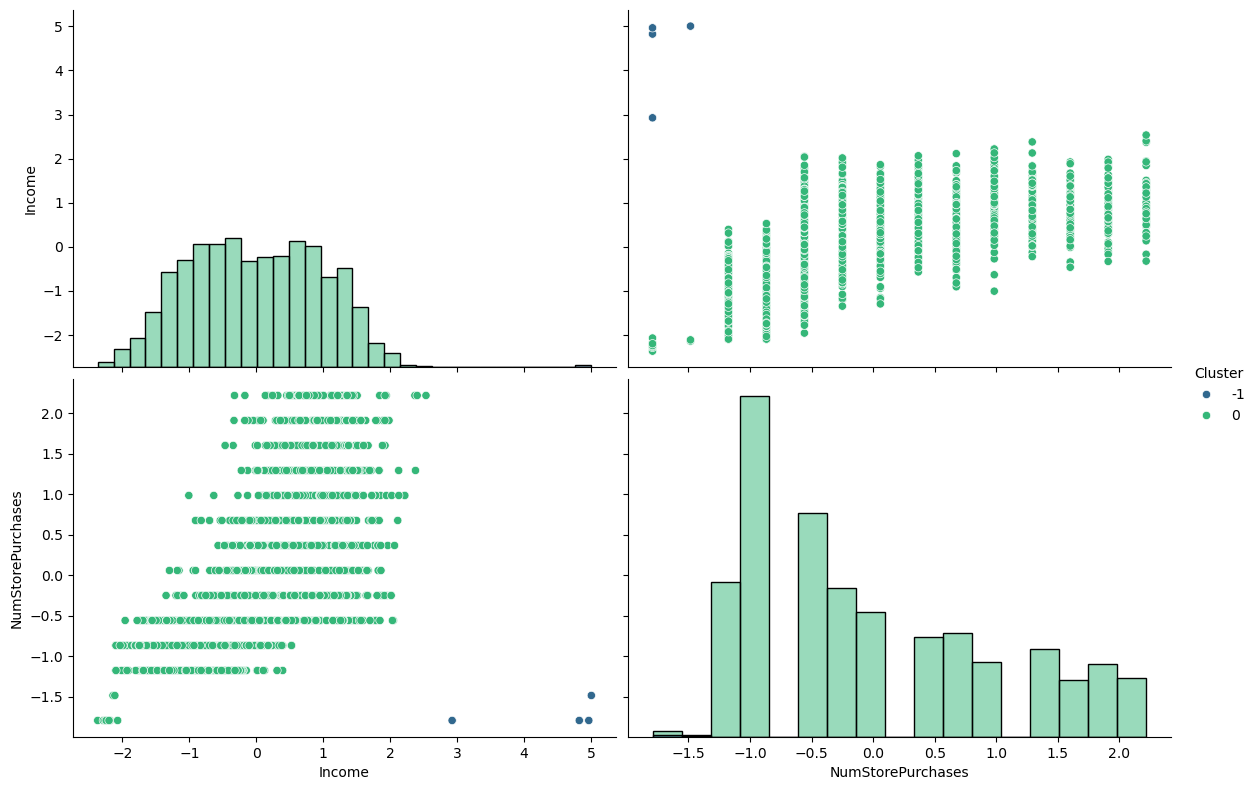

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Define clean_indices by performing data cleaning
# Drop rows with missing Income
df_cleaned = df.dropna(subset=['Income'])

# Remove the row with the maximum Income (outlier removal)
max_income_index = df_cleaned['Income'].idxmax()
df_cleaned = df_cleaned.drop(max_income_index)

# Reset the index and get the clean indices
df_cleaned = df_cleaned.reset_index(drop=True)
clean_indices = df_cleaned.index

# Step 2: Select the features for clustering
X = df_cleaned.loc[clean_indices, ['Income', 'NumStorePurchases']].copy()

# Step 3: Standardize the features (DBSCAN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=10)  # Tune eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

# Step 5: Add the DBSCAN cluster labels to the DataFrame
df_cleaned['Cluster'] = clusters

# Step 6: Select the features and cluster labels for plotting
plot_data = df_cleaned.loc[clean_indices, ['Income', 'NumStorePurchases', 'Cluster']].copy()

# Convert Cluster to categorical for better visualization
plot_data['Cluster'] = plot_data['Cluster'].astype('category')

# Step 7: Create the pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(plot_data, 
             vars=['Income', 'NumStorePurchases'],  # Features to plot
             hue='Cluster',                        # Color by cluster
             palette='viridis',                    # Color scheme
             diag_kind='hist',                     # Histograms on diagonal
             markers='o',                          # Marker style
             height=4,                             # Height of each subplot
             aspect=1.5)                           # Aspect ratio

plt.show()

> Plot a **Stacked Bar Chart** of **Spending Categories** Across **Clusters**.  
> - Calculate the **average spending** per **cluster** for product categories (e.g., **MntWines**, **MntFruits**) and visualize as a **stacked bar**.  
> - Highlights **spending patterns** and differences between **clusters** for targeted marketing insights.  
> - Assumes **Cluster** column and **spending_cols** are defined in the DataFrame.

In [ ]:
# Define spending columns
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds']

# Calculate mean spending per cluster
spending_by_cluster = df.groupby('Cluster')[spending_cols].mean()

# Plot stacked bar
spending_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Average Spending by Product Category per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Cluster Interpretation

Based on the K-Means clustering (k=3), the clusters are characterized as follows (using mean values from cluster_summary):

1. **Cluster 0:** High-Income Active Buyers. High Income and high NumStorePurchases. Low Recency (recent purchases) and high Total_Spending, particularly on MntWines and MntMeatProducts. These are likely loyal, premium customers who frequently purchase high-value items.
2. **Cluster 1:** Low-Income Occasional Buyers. Low Income and low NumStorePurchases. Higher Recency (less recent purchases) and low Total_Spending. This group may include potential churners who shop infrequently and spend less.
3. **Cluster 2:** Moderate-Income Balanced Buyers. Moderate Income and moderate NumStorePurchases. Balanced Recency and Total_Spending, with spending distributed across categories like MntWines and MntFruits. These customers represent a typical, stable segment that may respond well to targeted promotions.


## Business Recommendations

To leverage the customer segments, the following strategies are recommended:

1. **High-Income Active Buyers (Cluster 0):** Offer premium memberships, exclusive product lines, or VIP events to maintain loyalty and encourage continued high spending on categories like wines and meat products.
2. **Low-Income Occasional Buyers (Cluster 1):** Implement re-engagement campaigns with discounts, loyalty points, or budget-friendly offers to reduce churn and encourage more frequent purchases.
3. **Moderate-Income Balanced Buyers (Cluster 2):** Promote cross-selling opportunities (e.g., bundle wines with fruits or meat products) to increase Total_Spending and enhance engagement with this stable customer group.


## Project Summary

This project segmented 2240 customers into 3 clusters using K-Means, Hierarchical Clustering, and DBSCAN, focusing on Income and NumStorePurchases. K-Means with `k=3` achieved a silhouette score of `0.48`, indicating strong cluster separation, while Hierarchical Clustering and DBSCAN provided complementary insights (scores to be determined). The clusters identified distinct groups, including high-income active buyers and low-income occasional buyers, enabling targeted marketing strategies.

**Key Findings**:
- K-Means effectively segmented customers, with clear distinctions in purchasing behavior and income levels.
- Hierarchical Clustering confirmed similar clusters, while DBSCAN highlighted outliers.
- Business recommendations include premium offerings for high-value customers and re-engagement campaigns for potential churners.

**Limitations**:
- Limited to two features (Income, NumStorePurchases), potentially missing patterns in other variables (e.g., Recency, MntWines).
- Missing value imputation with mean may introduce bias.
- DBSCAN performance depends on eps tuning.

**Future Work**:
- Explore additional features (e.g., Recency, Kidhome) or PCA for dimensionality reduction.
- Test advanced algorithms like Gaussian Mixture Models.
- Validate clusters with external metrics (e.g., campaign response rates).

In [260]:
df.shape

(2209, 39)

In [264]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Tenure',
       'Total_Spending', 'Spending_Category', 'Total_Purchases',
       'Engaged_Customer', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Other', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Cluster'],
      dtype='object')